<a href="https://colab.research.google.com/github/cero1979/Repositorio/blob/main/AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

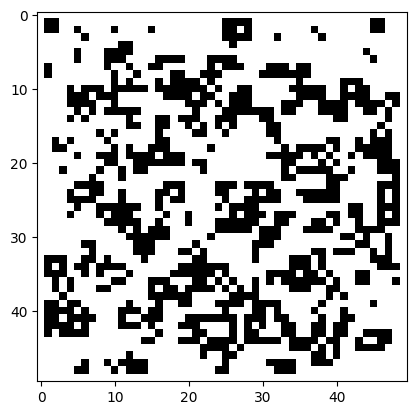

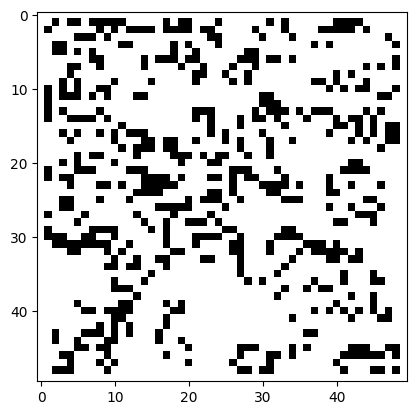

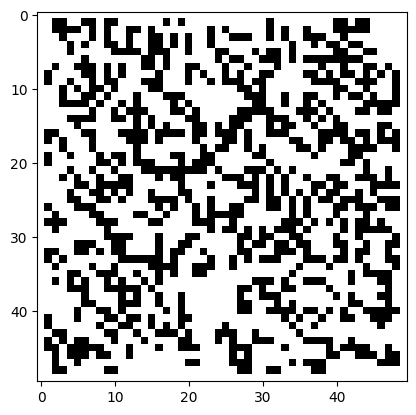

In [ ]:
#AC 2d Moore, Neumann, Hexa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Tamaño del tablero
filas = 50
columnas = 50

# Función para inicializar el tablero aleatoriamente
def estado_inicial_aleatorio(filas, columnas):
    return np.random.choice([0, 1], size=(filas, columnas))

# Función para aplicar las reglas del autómata celular de Von Neumann
def von_neumann_step(estado_antiguo):
    estado_nuevo = np.zeros(estado_antiguo.shape)
    for i in range(1, estado_antiguo.shape[0] - 1):
        for j in range(1, estado_antiguo.shape[1] - 1):
            suma_vecinos = estado_antiguo[i-1, j] + estado_antiguo[i+1, j] + estado_antiguo[i, j-1] + estado_antiguo[i, j+1]
            if estado_antiguo[i, j] == 1:
                if suma_vecinos < 2 or suma_vecinos > 3:
                    estado_nuevo[i, j] = 0
                else:
                    estado_nuevo[i, j] = 1
            else:
                if suma_vecinos == 3:
                    estado_nuevo[i, j] = 1
    return estado_nuevo

# Función para aplicar las reglas del autómata celular de Moore
def moore_step(estado_antiguo):
    estado_nuevo = np.zeros(estado_antiguo.shape)
    for i in range(1, estado_antiguo.shape[0] - 1):
        for j in range(1, estado_antiguo.shape[1] - 1):
            suma_vecinos = np.sum(estado_antiguo[i-1:i+2, j-1:j+2]) - estado_antiguo[i, j]
            if estado_antiguo[i, j] == 1:
                if suma_vecinos < 2 or suma_vecinos > 3:
                    estado_nuevo[i, j] = 0
                else:
                    estado_nuevo[i, j] = 1
            else:
                if suma_vecinos == 3:
                    estado_nuevo[i, j] = 1
    return estado_nuevo

# Función para aplicar las reglas del autómata celular hexagonal
def hexagonal_step(estado_antiguo):
    estado_nuevo = np.zeros(estado_antiguo.shape)
    for i in range(1, estado_antiguo.shape[0] - 1):
        for j in range(1, estado_antiguo.shape[1] - 1):
            suma_vecinos = estado_antiguo[i-1, j] + estado_antiguo[i+1, j] + estado_antiguo[i, j-1] + estado_antiguo[i, j+1] + estado_antiguo[i-1, j-1] + estado_antiguo[i+1, j+1]
            if estado_antiguo[i, j] == 1:
                if suma_vecinos < 2 or suma_vecinos > 3:
                    estado_nuevo[i, j] = 0
                else:
                    estado_nuevo[i, j] = 1
            else:
                if suma_vecinos == 3:
                    estado_nuevo[i, j] = 1
    return estado_nuevo

# Función para visualizar la simulación para Von Neumann
def visualizar_simulacion_von_neumann(estado_inicial, pasos):
    fig, ax = plt.subplots()
    img = ax.imshow(estado_inicial, cmap='binary')

    def actualizar(frame):
        nonlocal estado_inicial
        estado_inicial = von_neumann_step(estado_inicial)
        img.set_array(estado_inicial)
        return img,

    ani = animation.FuncAnimation(fig, actualizar, frames=pasos, interval=50, blit=True)
    plt.show()

# Función para visualizar la simulación para Moore
def visualizar_simulacion_moore(estado_inicial, pasos):
    fig, ax = plt.subplots()
    img = ax.imshow(estado_inicial, cmap='binary')

    def actualizar(frame):
        nonlocal estado_inicial
        estado_inicial = moore_step(estado_inicial)
        img.set_array(estado_inicial)
        return img,

    ani = animation.FuncAnimation(fig, actualizar, frames=pasos, interval=50, blit=True)
    plt.show()

# Función para visualizar la simulación para Hexagonal
def visualizar_simulacion_hexagonal(estado_inicial, pasos):
    fig, ax = plt.subplots()
    img = ax.imshow(estado_inicial, cmap='binary')

    def actualizar(frame):
        nonlocal estado_inicial
        estado_inicial = hexagonal_step(estado_inicial)
        img.set_array(estado_inicial)
        return img,

    ani = animation.FuncAnimation(fig, actualizar, frames=pasos, interval=50, blit=True)
    plt.show()

# Inicializar el estado inicial aleatoriamente
estado_inicial = estado_inicial_aleatorio(filas, columnas)

# Visualizar la simulación para Von Neumann
visualizar_simulacion_von_neumann(estado_inicial, pasos=100)

# Visualizar la simulación para Moore
visualizar_simulacion_moore(estado_inicial, pasos=100)

# Visualizar la simulación para Hexagonal
visualizar_simulacion_hexagonal(estado_inicial, pasos=100)


In [ ]:
#Juego de la vida solo pantalla modo Moore

import numpy as np

# Tamaño de la cuadrícula
n = 6

# Función para inicializar la cuadrícula con 5 células vivas en una configuración de glider
def inicializar_cuadricula():
    grid = np.zeros((n, n))
    grid[1, 2] = 1
    grid[2, 3] = 1
    grid[3, 1:4] = 1
    return grid

# Función para aplicar las reglas del Juego de la Vida de Conway
def aplicar_reglas(grid):
    nueva_grid = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            vecinos = obtener_vecinos(i, j, grid)
            num_vecinos_vivos = sum(grid[x, y] for x, y in vecinos)
            if grid[i, j] == 0:  # Célula muerta
                if num_vecinos_vivos == 3:
                    nueva_grid[i, j] = 1  # Nacimiento
            else:  # Célula viva
                if num_vecinos_vivos == 1 or num_vecinos_vivos > 3:
                    nueva_grid[i, j] = 0  # Muerte
                else:
                    nueva_grid[i, j] = 1  # Sobrevivencia
    return nueva_grid

# Función para obtener los vecinos de una celda en la cuadrícula (Moore)
def obtener_vecinos(i, j, grid):
    vecinos = []
    for x in range(i-1, i+2):
        for y in range(j-1, j+2):
            if (x, y) != (i, j) and 0 <= x < n and 0 <= y < n:
                vecinos.append((x, y))
    return vecinos

# Función para imprimir la cuadrícula en cada tiempo
def imprimir_cuadriculas():
    # Inicializar la cuadrícula
    grid = inicializar_cuadricula()

    for t in range(10):
        print("Tiempo t={}".format(t))
        for i in range(n):
            for j in range(n):
                if grid[i, j] == 1:
                    print('█', end=' ')  # Imprimir negro para célula viva
                else:
                    print(' ', end=' ')  # Imprimir espacio en blanco para célula muerta
            print()  # Salto de línea
        print()  # Salto de línea entre cuadrículas
        grid = aplicar_reglas(grid)

# Imprimir la cuadrícula en cada tiempo
imprimir_cuadriculas()


Tiempo t=0
            
    █       
      █     
  █ █ █     
            
            

Tiempo t=1
            
            
  █   █     
    █ █     
    █       
            

Tiempo t=2
            
            
      █     
  █   █     
    █ █     
            

Tiempo t=3
            
            
    █       
      █ █   
    █ █     
            

Tiempo t=4
            
            
      █     
        █   
    █ █ █   
            

Tiempo t=5
            
            
            
    █   █   
      █ █   
      █     

Tiempo t=6
            
            
            
        █   
    █   █   
      █ █   

Tiempo t=7
            
            
            
      █     
        █ █ 
      █ █   

Tiempo t=8
            
            
            
        █   
          █ 
      █ █ █ 

Tiempo t=9
            
            
            
            
      █   █ 
        █ █ 



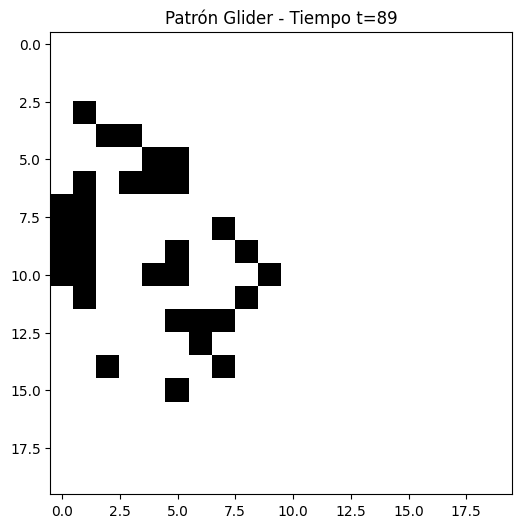

In [ ]:
#Juego de la vida con patron Glider

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Tamaño de la cuadrícula
n = 20

# Función para inicializar la cuadrícula con el patrón glider
def inicializar_cuadricula():
    grid = np.zeros((n, n))
    grid[1, 3] = 1
    grid[2, 1:4] = 1
    grid[3, 2] = 1
    return grid

# Función para aplicar las reglas del Juego de la Vida de Conway
def aplicar_reglas(grid):
    nueva_grid = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            vecinos = obtener_vecinos(i, j, grid)
            num_vecinos_vivos = sum(grid[x, y] for x, y in vecinos)
            if grid[i, j] == 0:  # Célula muerta
                if num_vecinos_vivos == 3:
                    nueva_grid[i, j] = 1  # Nacimiento
            else:  # Célula viva
                if num_vecinos_vivos == 1 or num_vecinos_vivos > 3:
                    nueva_grid[i, j] = 0  # Muerte
                else:
                    nueva_grid[i, j] = 1  # Sobrevivencia
    return nueva_grid

# Función para obtener los vecinos de una celda en la cuadrícula (Moore)
def obtener_vecinos(i, j, grid):
    vecinos = []
    for x in range(i-1, i+2):
        for y in range(j-1, j+2):
            if (x, y) != (i, j) and 0 <= x < n and 0 <= y < n:
                vecinos.append((x, y))
    return vecinos

# Función para generar la animación de la evolución de la cuadrícula con el patrón glider y guardarla como video
def generar_video_glider():
    fig, ax = plt.subplots(figsize=(6, 6))

    # Inicializar la cuadrícula
    grid = inicializar_cuadricula()

    def actualizar(frame):
        nonlocal grid
        ax.clear()
        ax.imshow(grid, cmap='binary')
        ax.set_title('Patrón Glider - Tiempo t={}'.format(frame))
        grid = aplicar_reglas(grid)
        return ax

    anim = animation.FuncAnimation(fig, actualizar, frames=90, interval=500, blit=False)

    writer = animation.FFMpegWriter(fps=2)
    anim.save('gliderAni.mp4', writer=writer)

# Generar la animación de la evolución de la cuadrícula con el patrón glider y guardarla como video
generar_video_glider()


In [ ]:
#Juego de la vida animado

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Función para calcular el siguiente estado del tablero según las reglas del Juego de la Vida de Conway
def siguiente_generacion(tablero):
    filas, columnas = tablero.shape
    nuevo_tablero = np.zeros_like(tablero)
    for i in range(filas):
        for j in range(columnas):
            # Contamos el número de vecinos vivos
            vecinos = np.sum(tablero[max(0, i-1):min(filas, i+2), max(0, j-1):min(columnas, j+2)]) - tablero[i, j]
            # Aplicamos las reglas del juego
            if tablero[i, j] == 1 and (vecinos < 2 or vecinos > 3):
                nuevo_tablero[i, j] = 0  # Muere por baja población o sobrepoblación
            elif tablero[i, j] == 0 and vecinos == 3:
                nuevo_tablero[i, j] = 1  # Nace por reproducción
            else:
                nuevo_tablero[i, j] = tablero[i, j]  # Mantiene el estado actual
    return nuevo_tablero

# Crear un tablero aleatorio inicial
def tablero_aleatorio(filas, columnas):
    return np.random.choice([0, 1], size=(filas, columnas))

# Definir el tamaño del tablero
filas, columnas = 50, 50
tablero = tablero_aleatorio(filas, columnas)

# Configurar la visualización
fig = plt.figure()
plt.title('Juego de la Vida de Conway')

# Definir un esquema de color binario (blanco para células vivas, negro para células muertas)
cmap = plt.cm.binary

# Función de inicialización para crear el primer cuadro
def inicializacion():
    img.set_data(tablero)
    return (img,)

# Función de animación para actualizar el tablero en cada cuadro
def animacion(cuadro):
    global tablero
    tablero = siguiente_generacion(tablero)
    img.set_array(tablero)
    return (img,)

# Crear la animación
img = plt.imshow(tablero, cmap=cmap, interpolation='nearest')
ani = animation.FuncAnimation(fig, animacion, init_func=inicializacion, frames=100, interval=200, blit=True)

# Guardar la animación como un archivo de video
ani.save('juego_de_la_vida.mp4', writer='ffmpeg')

plt.show()


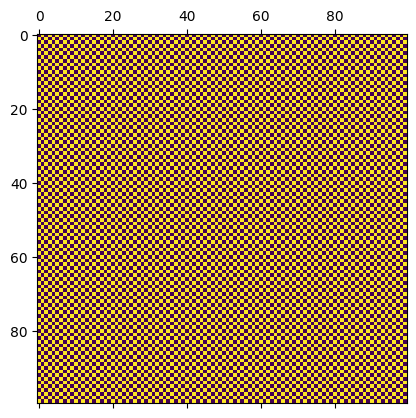

In [ ]:
#modelo difusión
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Dimensiones de la cuadrícula
filas = 100
columnas = 100

# Función para inicializar la densidad de partículas en la cuadrícula
def inicializar_densidad(filas, columnas):
    centro_x, centro_y = filas // 2, columnas // 2
    radio = min(filas, columnas) // 5  # Radio de la región densa

    densidad = np.zeros((filas, columnas))
    for i in range(filas):
        for j in range(columnas):
            distancia = np.sqrt((i - centro_x) ** 2 + (j - centro_y) ** 2)
            if distancia <= radio:
                densidad[i, j] = 1.0  # Región densa en el centro
    return densidad

# Inicialización de la densidad de partículas
densidad = inicializar_densidad(filas, columnas)

# Función de evolución que representa la difusión de partículas en la cuadrícula
def evolucion(densidad):
    nueva_densidad = np.zeros_like(densidad)
    filas, columnas = densidad.shape

    # Coeficiente de difusión
    coeficiente_difusion = 0.1

    # Iterar sobre cada celda en la cuadrícula
    for i in range(filas):
        for j in range(columnas):
            # Difusión de partículas hacia las celdas vecinas
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                if 0 <= i + dx < filas and 0 <= j + dy < columnas:
                    nueva_densidad[i, j] += coeficiente_difusion * (densidad[i + dx, j + dy] - densidad[i, j])

    # Normalizar los valores de densidad para mantener la densidad total constante
    densidad_total = np.sum(nueva_densidad)
    if densidad_total != 0:
        nueva_densidad /= densidad_total

    return nueva_densidad

# Función de actualización para la animación
def actualizar(data):
    global densidad
    densidad = evolucion(densidad)
    mat.set_data(densidad)
    return [mat]

# Configuración de la animación
fig, ax = plt.subplots()
mat = ax.matshow(densidad, cmap='viridis')
ani = animation.FuncAnimation(fig, actualizar, frames=200, interval=100, blit=True)

# Guardar la animación en un archivo de video
ani.save('animacion_difusion.mp4', writer='ffmpeg', fps=30)

plt.show()


In [ ]:
#modelo Gas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Dimensiones de la cuadrícula
filas = 50
columnas = 50

# Inicialización aleatoria de la concentración de gas en la cuadrícula
cuadricula = np.random.rand(filas, columnas)

# Función de evolución que representa la difusión de gas en la cuadrícula
def evolucion(cuadricula):
    nueva_cuadricula = np.zeros_like(cuadricula)
    filas, columnas = cuadricula.shape

    # Coeficiente de difusión
    coeficiente_difusion = 0.1

    # Iterar sobre cada celda en la cuadrícula
    for i in range(filas):
        for j in range(columnas):
            # Difusión de gas hacia las celdas vecinas
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                if 0 <= i + dx < filas and 0 <= j + dy < columnas:
                    nueva_cuadricula[i, j] += coeficiente_difusion * (cuadricula[i + dx, j + dy] - cuadricula[i, j])

    # Normalizar los valores de la cuadrícula para mantener la concentración total constante
    concentracion_total = np.sum(nueva_cuadricula)
    if concentracion_total != 0:
        nueva_cuadricula /= concentracion_total

    return nueva_cuadricula

# Función de animación
def actualizar(datos):
    global cuadricula
    cuadricula = evolucion(cuadricula)
    mat.set_data(cuadricula)
    return [mat]

# Configuración de la animación
fig, ax = plt.subplots()
mat = ax.matshow(cuadricula, cmap='viridis')
ani = animation.FuncAnimation(fig, actualizar, interval=100, frames=50, blit=True)

# Guardar la animación en un archivo de video
ani.save('animacion_gas.mp4', writer='ffmpeg')

plt.show()


<ipython-input-10-2027f14410fc>:34: RuntimeWarning: overflow encountered in scalar multiply
  nueva_cuadricula[i, j] += tasa_reaccion_A * cuadricula[i, j] * (1 - cuadricula[(i + 1) % filas, j]) * cuadricula[(i - 1) % filas, j]
<ipython-input-10-2027f14410fc>:36: RuntimeWarning: overflow encountered in scalar multiply
  nueva_cuadricula[i, j] += tasa_reaccion_B * cuadricula[i, j] * (1 - cuadricula[i, (j + 1) % columnas]) * cuadricula[i, (j - 1) % columnas]
<ipython-input-10-2027f14410fc>:36: RuntimeWarning: invalid value encountered in scalar add
  nueva_cuadricula[i, j] += tasa_reaccion_B * cuadricula[i, j] * (1 - cuadricula[i, (j + 1) % columnas]) * cuadricula[i, (j - 1) % columnas]
<ipython-input-10-2027f14410fc>:35: RuntimeWarning: overflow encountered in scalar multiply
  nueva_cuadricula[i, j] -= tasa_inhibicion * cuadricula[i, j] * cuadricula[(i + 1) % filas, j]
<ipython-input-10-2027f14410fc>:35: RuntimeWarning: invalid value encountered in scalar subtract
  nueva_cuadricula[i, 

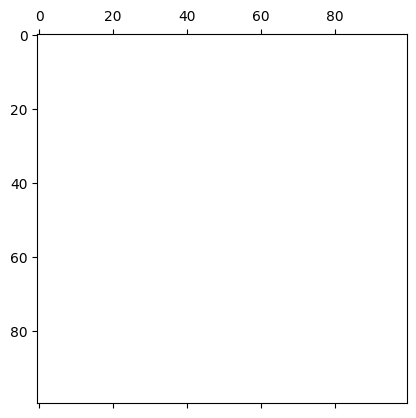

In [ ]:
#Evolucion ecuacion B-Z
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Dimensiones de la cuadrícula
filas = 100
columnas = 100

# Inicialización aleatoria de la cuadrícula con valores entre 0 y 1
cuadricula = np.random.rand(filas, columnas)

# Función de evolución que representa la reacción de Belousov-Zhabotinsky
def evolucion(cuadricula):
    nueva_cuadricula = np.zeros_like(cuadricula)
    filas, columnas = cuadricula.shape

    # Parámetros de la reacción BZ (puedes ajustar estos valores según sea necesario)
    tasa_difusion = 0.1
    tasa_reaccion_A = 1.0
    tasa_reaccion_B = 1.2
    tasa_inhibicion = 0.8

    # Iterar sobre cada celda en la cuadrícula
    for i in range(filas):
        for j in range(columnas):
            # Difusión
            nueva_cuadricula[i, j] += (1 - 4 * tasa_difusion) * cuadricula[i, j]
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                if 0 <= i + dx < filas and 0 <= j + dy < columnas:
                    nueva_cuadricula[i, j] += tasa_difusion * cuadricula[i + dx, j + dy]

            # Reacciones autocatalíticas e inhibición
            nueva_cuadricula[i, j] += tasa_reaccion_A * cuadricula[i, j] * (1 - cuadricula[(i + 1) % filas, j]) * cuadricula[(i - 1) % filas, j]
            nueva_cuadricula[i, j] -= tasa_inhibicion * cuadricula[i, j] * cuadricula[(i + 1) % filas, j]
            nueva_cuadricula[i, j] += tasa_reaccion_B * cuadricula[i, j] * (1 - cuadricula[i, (j + 1) % columnas]) * cuadricula[i, (j - 1) % columnas]

    return nueva_cuadricula

# Configuración inicial de la animación
fig, ax = plt.subplots()
mat = ax.matshow(cuadricula, cmap='viridis')

# Función de actualización para la animación
def actualizar(data):
    global cuadricula
    cuadricula = evolucion(cuadricula)
    mat.set_data(cuadricula)
    return [mat]

# Configuración de la animación
ani = animation.FuncAnimation(fig, actualizar, interval=50, frames=50, blit=True)

# Guardar la animación como un archivo de video
ani.save('belousov_zhabotinsky.mp4', writer='ffmpeg', fps=10)

plt.show()


In [ ]:
#Modelo Economía
import numpy as np
import time

def aplicar_regla(izquierda, centro, derecha):
    if centro == 0 and (izquierda + derecha) >= 3:
        return 1  # Se vuelve rico
    elif centro == 1 and (izquierda + derecha) < 2:
        return 0  # Se vuelve pobre
    elif centro == 0 and (izquierda + derecha) < 3:
        return np.random.choice([0, 1])  # Aleatoriamente permanece en el mismo estado o se vuelve pobre
    else:
        return 1  # Permanece rico

def evolucion(fila):
    nueva_fila = [0] * len(fila)
    for i in range(len(fila)):
        izquierda = fila[i - 1]
        centro = fila[i]
        derecha = fila[(i + 1) % len(fila)]  # Condición de frontera periódica
        nueva_fila[i] = aplicar_regla(izquierda, centro, derecha)
    return nueva_fila

def mostrar(estados):
    for fila in estados:
        print(''.join('R' if celda else 'P' for celda in fila))

def principal():
    # Configuración inicial (cada célula representa un agente económico)
    num_agentes = 50
    estado_inicial = np.random.choice([0, 1], size=num_agentes)

    # Evolución gradual y visualización
    estados = [estado_inicial]
    for t in range(10):  # Evolución durante 10 pasos de tiempo
        siguiente_estado = evolucion(estados[-1])
        estados.append(siguiente_estado)
        print(f"Paso de tiempo {t + 1}:")
        mostrar(estados)
        print("\n---\n")
        time.sleep(1)  # Esperar 1 segundo antes de mostrar el siguiente paso de tiempo

if __name__ == '__main__':
    principal()


Paso de tiempo 1:
RRPPPPRPPRPRRRPPPPRPPPPRRPRRRRPRRRRPRRRRRPPPRPPPPP
PPRRPRPRRPPPRPPPPRPRPRPPPPPRRPPPRRPPPRRRPRRRPPPPPR

---

Paso de tiempo 2:
RRPPPPRPPRPRRRPPPPRPPPPRRPRRRRPRRRRPRRRRRPPPRPPPPP
PPRRPRPRRPPPRPPPPRPRPRPPPPPRRPPPRRPPPRRRPRRRPPPPPR
PPPPPPRPPRPRPRRPRPPPRPPPRPPPPPPPPPRRPPRPRPRPPPRPPP

---

Paso de tiempo 3:
RRPPPPRPPRPRRRPPPPRPPPPRRPRRRRPRRRRPRRRRRPPPRPPPPP
PPRRPRPRRPPPRPPPPRPRPRPPPPPRRPPPRRPPPRRRPRRRPPPPPR
PPPPPPRPPRPRPRRPRPPPRPPPRPPPPPPPPPRRPPRPRPRPPPRPPP
RPRPRPPPRPRPPPPPPPPRPRPRPRRRRRRPRRPPRRPRPPPRPRPRPR

---

Paso de tiempo 4:
RRPPPPRPPRPRRRPPPPRPPPPRRPRRRRPRRRRPRRRRRPPPRPPPPP
PPRRPRPRRPPPRPPPPRPRPRPPPPPRRPPPRRPPPRRRPRRRPPPPPR
PPPPPPRPPRPRPRRPRPPPRPPPRPPPPPPPPPRRPPRPRPRPPPRPPP
RPRPRPPPRPRPPPPPPPPRPRPRPRRRRRRPRRPPRRPRPPPRPRPRPR
PPPPPPRRPRPRRRRRRPRPRPRPRPRRRRPPPPRPPPPPPRRPPPRPPP

---

Paso de tiempo 5:
RRPPPPRPPRPRRRPPPPRPPPPRRPRRRRPRRRRPRRRRRPPPRPPPPP
PPRRPRPRRPPPRPPPPRPRPRPPPPPRRPPPRRPPPRRRPRRRPPPPPR
PPPPPPRPPRPRPRRPRPPPRPPPRPPPPPPPPPRRPPRPRPRPPPRPPP
RPRPRPPPRPRPPPPPPPP

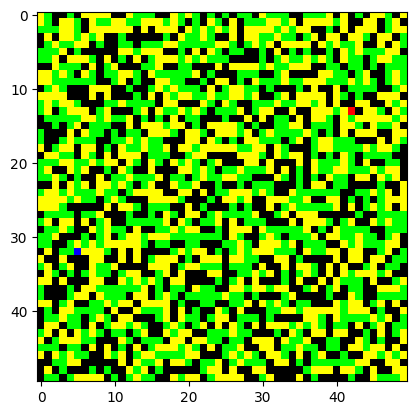

In [ ]:
#Animación Hormigas (vant)
mport numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Tamaño de la retícula
n = 50

# Colores
VACIO = 0
ALIMENTO_VERDE = 1
ALIMENTO_AMARILLO = 2
HORMIGA_ROJA = 3
HORMIGA_AZUL = 4

# Direcciones
ESTE = 0
OESTE = 1
NORTE = 2
SUR = 3

class Hormiga:
    def __init__(self, color, x, y):
        self.color = color
        self.x = x
        self.y = y
        self.direccion = ESTE

    def moverse(self):
        if self.color == HORMIGA_ROJA:
            if reticula[self.x, self.y] == ALIMENTO_VERDE:
                if self.direccion != NORTE:  # Evitar cambios de color repetidos
                    self.direccion = (self.direccion + 1) % 4
                    reticula[self.x, self.y] = ALIMENTO_AMARILLO
            elif reticula[self.x, self.y] == ALIMENTO_AMARILLO:
                if self.direccion != SUR:  # Evitar cambios de color repetidos
                    self.direccion = (self.direccion - 1) % 4
                    reticula[self.x, self.y] = ALIMENTO_VERDE
        elif self.color == HORMIGA_AZUL:
            if reticula[self.x, self.y] == ALIMENTO_VERDE:
                if self.direccion != SUR:  # Evitar cambios de color repetidos
                    self.direccion = (self.direccion - 1) % 4
                    reticula[self.x, self.y] = ALIMENTO_AMARILLO
            elif reticula[self.x, self.y] == ALIMENTO_AMARILLO:
                if self.direccion != NORTE:  # Evitar cambios de color repetidos
                    self.direccion = (self.direccion + 1) % 4
                    reticula[self.x, self.y] = ALIMENTO_VERDE

        if self.direccion == ESTE:
            self.y = (self.y + 1) % n
        elif self.direccion == OESTE:
            self.y = (self.y - 1) % n
        elif self.direccion == NORTE:
            self.x = (self.x - 1) % n
        elif self.direccion == SUR:
            self.x = (self.x + 1) % n

def inicializar_reticula():
    return np.random.choice([VACIO, ALIMENTO_VERDE, ALIMENTO_AMARILLO], size=(n, n))

def actualizar(frame):
    global reticula, hormigas
    for hormiga in hormigas:
        hormiga.moverse()
    reticula_colorida = np.zeros((n, n, 3))
    for i in range(n):
        for j in range(n):
            if reticula[i, j] == ALIMENTO_VERDE:
                reticula_colorida[i, j] = [0, 1, 0]  # Color verde
            elif reticula[i, j] == ALIMENTO_AMARILLO:
                reticula_colorida[i, j] = [1, 1, 0]  # Color amarillo
    for hormiga in hormigas:
        if hormiga.color == HORMIGA_ROJA:
            reticula_colorida[hormiga.x, hormiga.y] = [1, 0, 0]  # Color rojo
        elif hormiga.color == HORMIGA_AZUL:
            reticula_colorida[hormiga.x, hormiga.y] = [0, 0, 1]  # Color azul
    imagen.set_array(reticula_colorida)
    return imagen,

reticula = inicializar_reticula()
hormigas = [Hormiga(HORMIGA_ROJA, n//3, n//3), Hormiga(HORMIGA_AZUL, 2*n//3, 2*n//3)]

fig = plt.figure()
imagen = plt.imshow(np.zeros((n, n, 3)), interpolation='nearest')
anim = animation.FuncAnimation(fig, actualizar, frames=100, interval=100, blit=True)

anim.save('hormigas.mp4', writer='ffmpeg', fps=10)
plt.show()
